# Tri par Fusion

[John von Neumann](https://fr.wikipedia.org/wiki/John_von_Neumann), 1945

## Principe

On peut facilement fusionner deux listes triées en une seule en en extrayant itérativement le plus petit élément. Celui-ci est forcément aussi le plus petit de l'une des deux listes à fusionner. 

Ce procédé est appelé fusion et est au cœur de l'algorithme de tri par fusion récursif.

* Si le tableau n'a qu'un élément, il est déjà trié.
* Sinon, séparer le tableau en deux parties à peu près égales.
* Trier récursivement les deux parties avec l'algorithme du tri fusion.
* Fusionner les deux parties triées en un seul tableau trié.

## Fusion 

Entrée: les sous-tableaux `T[permier:limite]` et `T[limite:dernier]`, supposés triés.

Sortie: le tableau `T[premier:dernier]` est trié

In [1]:
import include.helpers as asd1

In [2]:
def fusion(T, premier, limite, dernier):     
    asd1.affiche_entree_fusion(T,premier, limite, dernier)

    T1 = T[premier:limite].copy()
    T2 = T[limite:dernier].copy()
    
    i = premier; i1 = i2 = 0
    
    while i1 < len(T1) and i2 < len(T2):
        if T2[i2] < T1[i1]:
            T[i] = T2[i2]; i2 += 1
        else:
            T[i] = T1[i1]; i1 += 1
        i += 1

    for j in range(i1,len(T1)): T[i] = T1[j]; i += 1

    for j in range(i2,len(T2)): T[i] = T2[j]; i += 1

    asd1.affiche_sortie_fusion(T1,T2,T[premier:dernier])

In [3]:
T = [ 3, 4, 5, 1, 2, 6 ]
fusion( T, 0, 3, 6 )

[3, 4, 5, 1, 2, 6]  M(0,3,6) 
  [3, 4, 5] + [1, 2, 6] => [1, 2, 3, 4, 5, 6]


## Récursion

* Entrée: le tableau `T[premier:dernier]` dans un ordre quelconque

* Cas trivial: `T` a 0 ou 1 élément, ne rien faire

* Cas général: diviser `T` en deux, les trier récursivement, puis les fusionner

* Sortie: `T[premier:dernier]` est trié

In [4]:
def recursion(T,premier,dernier):  
    asd1.affiche_entree_tri_fusion(T,premier, dernier)
    
    N = dernier - premier
    if N >= 2:
            
        milieu = premier + int(N/2)
        recursion(T,premier,milieu)
        recursion(T,milieu,dernier)
        fusion(T,premier,milieu,dernier)
        
def tri(T):
    recursion(T,0,len(T))

In [5]:
T = [5, 4, 3, 2, 6, 7, 1]
tri(T)

[5, 4, 3, 2, 6, 7, 1]  S(0,7)
[5, 4, 3, 2, 6, 7, 1]    S(0,3)
[5, 4, 3, 2, 6, 7, 1]      S(0,1)
[5, 4, 3, 2, 6, 7, 1]    S(1,3)
[5, 4, 3, 2, 6, 7, 1]      S(1,2)
[5, 4, 3, 2, 6, 7, 1]      S(2,3)
[5, 4, 3, 2, 6, 7, 1]    M(1,2,3) 
  [4] + [3] => [3, 4]
[5, 3, 4, 2, 6, 7, 1]    M(0,1,3) 
  [5] + [3, 4] => [3, 4, 5]
[3, 4, 5, 2, 6, 7, 1]  S(3,7)
[3, 4, 5, 2, 6, 7, 1]    S(3,5)
[3, 4, 5, 2, 6, 7, 1]      S(3,4)
[3, 4, 5, 2, 6, 7, 1]      S(4,5)
[3, 4, 5, 2, 6, 7, 1]    M(3,4,5) 
  [2] + [6] => [2, 6]
[3, 4, 5, 2, 6, 7, 1]    S(5,7)
[3, 4, 5, 2, 6, 7, 1]      S(5,6)
[3, 4, 5, 2, 6, 7, 1]      S(6,7)
[3, 4, 5, 2, 6, 7, 1]    M(5,6,7) 
  [7] + [1] => [1, 7]
[3, 4, 5, 2, 6, 1, 7]  M(3,5,7) 
  [2, 6] + [1, 7] => [1, 2, 6, 7]
[3, 4, 5, 1, 2, 6, 7]  M(0,3,7) 
  [3, 4, 5] + [1, 2, 6, 7] => [1, 2, 3, 4, 5, 6, 7]


## En résumé

Le tri par fusion est mis en oeuvre de manière récursive. Il commence par faire deux appels récursifs sur les moitiés gauche et droite du tableau, puis les fusionne. 


Notons que comme l'opération de fusion n'étant appelée qu'une fois, il n'est pas nécessaire de l'écrire dans une fonction séparée

*Note: La fonction de comparaison est passée en paramètre générique pour permettre l'analyse de la stabilité, et les opérations de comparaison et d'assignation dans le tableau sont sous-traitées à include.helpers pour permettre de les compter lors de l'analyse de la complexité*

In [6]:
def fusionner(T,premier,milieu,dernier,comparer = asd1.plus_petit):        
        T1 = T[premier:milieu].copy(); i1 = 0
        T2 = T[milieu:dernier].copy(); i2 = 0
        i = premier; 
    
        while i1 < len(T1) and i2 < len(T2):
            if comparer(T2[i2],T1[i1]):
                T[i] = asd1.assigner(T2[i2]); i2 += 1;
            else:
                T[i] = asd1.assigner(T1[i1]); i1 += 1;
            i += 1
        for j in range(i1,len(T1)):
            T[i] = asd1.assigner(T1[j]); i += 1; 
        for j in range(i2,len(T2)):
            T[i] = asd1.assigner(T2[j]); i += 1;
                
def tri_fusion_recursif(T,premier,dernier,comparer = asd1.plus_petit): 
    if dernier - premier >= 2:          
        milieu = premier + int((dernier - premier)/2)
        tri_fusion_recursif(T, premier, milieu, comparer)
        tri_fusion_recursif(T, milieu, dernier, comparer)
        fusionner(T,premier,milieu,dernier,comparer)
        
def tri_fusion(T, comparer = asd1.plus_petit ):
    tri_fusion_recursif(T,0,len(T),comparer)

## Complexité

Evaluons d'abord la complexité du tri d'un tableau au contenu généré aléatoirement. 

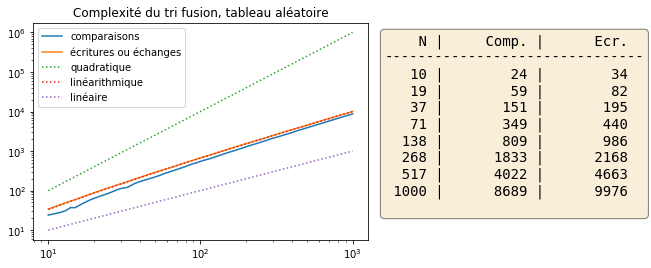

In [7]:
asd1.evalue_complexite(tri_fusion, asd1.tableau_aleatoire, 
                       "tri fusion, tableau aléatoire")

La complexité du tri est linéarithmique en $\Theta(n\log(n))$. C'est assez simple à démontrer si l'on considère l'algorithme par niveau de récursion. 

* Notons tout d'abord que chaque appel récursif divise par deux la taille du tableau à traiter. La profondeur totale de la récursion est donc proportionnelle à $\log_2(n)$.
* Considérons maintenant une profondeur de récursion donnée.
   * au premier niveau, la fusion est effectuée une seule fois sur l'ensemble des $n$ éléments
   * au second niveau, deux fusions sont effectuées, mais à chaque fois sur la moitié des éléments seulement, pour un total de $2 \frac{n}{2} = n$ éléments fusionnés
   * au $k^{ieme}$ niveau, environ $2^{k-1}$ fusions sont effectuées, chacune sur environ $\frac{n}{2^{k-1}}$ éléments pour un total de n éléments fusionnés. 
   * à chaque niveau de récursion, la fusion requiert donc en tout de déplacer $n$ éléments
* Il y a donc en tout $n\log(n)$ éléments testés et déplacés par les opérations de fusion

## Stabilité

Le tri fusion est **stable**. 

La ligne critique est le test `T2[i2] < T1[i1]`. En cas d'égalité entre l'élément le plus petit de T1 ou de T2, il faut d'abord copier dans T celui de T1, puisque celui-ci vient de la section `[premier:milieu]` qui est antérieure à la section `[milieu:dernier]`

Vérifions le en triant par parties fractionnaires puis par parties entières. 


Le tri est stable


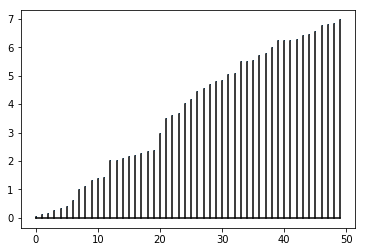

In [8]:
asd1.test_stabilite(tri_fusion)

## Visualisation

Trions un tableau de 64 entiers aléatoires entre 0 et 100. Nous affichons l'état du tableau aprés les étapes de fusion qui fusionnent 16 éléments ou plus. 

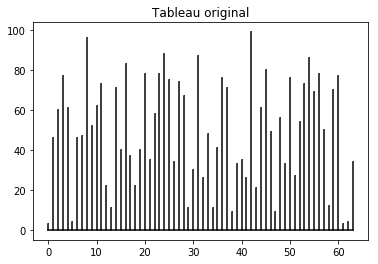

In [9]:
import numpy as np
T = np.random.randint(0,100,64)
asd1.afficheIteration(T,'Tableau original')  

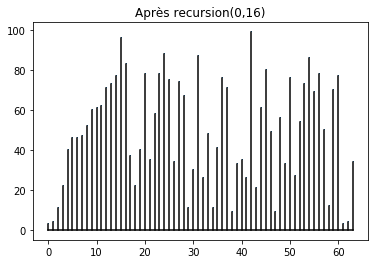

In [10]:
tri_fusion_recursif(T,0,16)
asd1.afficheIteration(T,'Après recursion(0,16)')  

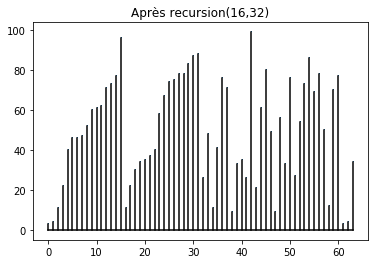

In [11]:
tri_fusion_recursif(T,16,32)
asd1.afficheIteration(T,'Après recursion(16,32)') 

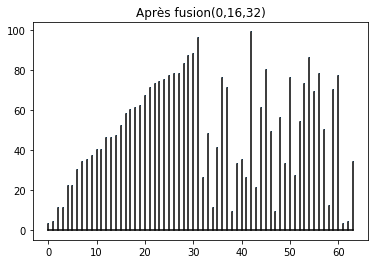

In [12]:
fusionner(T,0,16,32)
asd1.afficheIteration(T,'Après fusion(0,16,32)') 

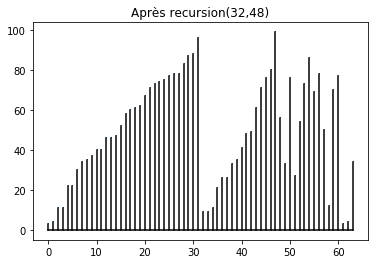

In [13]:
tri_fusion_recursif(T,32,48)
asd1.afficheIteration(T,'Après recursion(32,48)')  

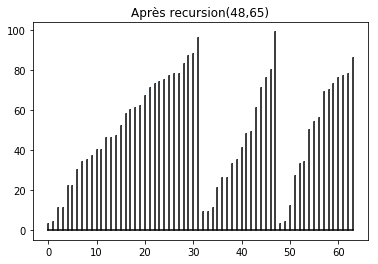

In [14]:
tri_fusion_recursif(T,48,64)
asd1.afficheIteration(T,'Après recursion(48,65)')  

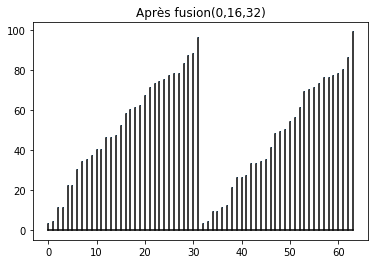

In [15]:
fusionner(T,32,48,64)
asd1.afficheIteration(T,'Après fusion(0,16,32)')

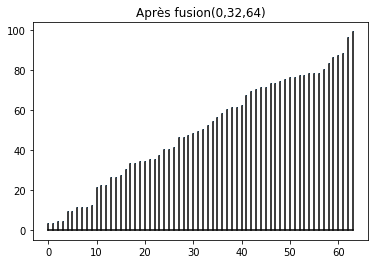

In [16]:
fusionner(T,0,32,64)
asd1.afficheIteration(T,'Après fusion(0,32,64)')

[ASD1 Notebooks on GitHub.io](https://ocuisenaire.github.io/ASD1-notebooks/)

© Olivier Cuisenaire, 2018